# Project Title: Integrating Traditional Health Data and Simulated Wearable Device Metrics for Stroke Prediction
## Author: Ebelechukwu Chidimma Igwagu

### Problem Statement:  What is the likelihood of a patient having stroke or not based on the available **categorical** data from the patient records?

In [75]:
# import dependencies

import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() #set seaborn as default style for plots when using matplotlib

In [76]:
filepath = r'C:\Users\great\Desktop\ATU\Semester 2\PFDA\pfda_project\healthcare-dataset-stroke-data.csv'

In [77]:
df = pd.read_csv(filepath)
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Column name and Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient (years)
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

[Reference Source](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download)

In [78]:
df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


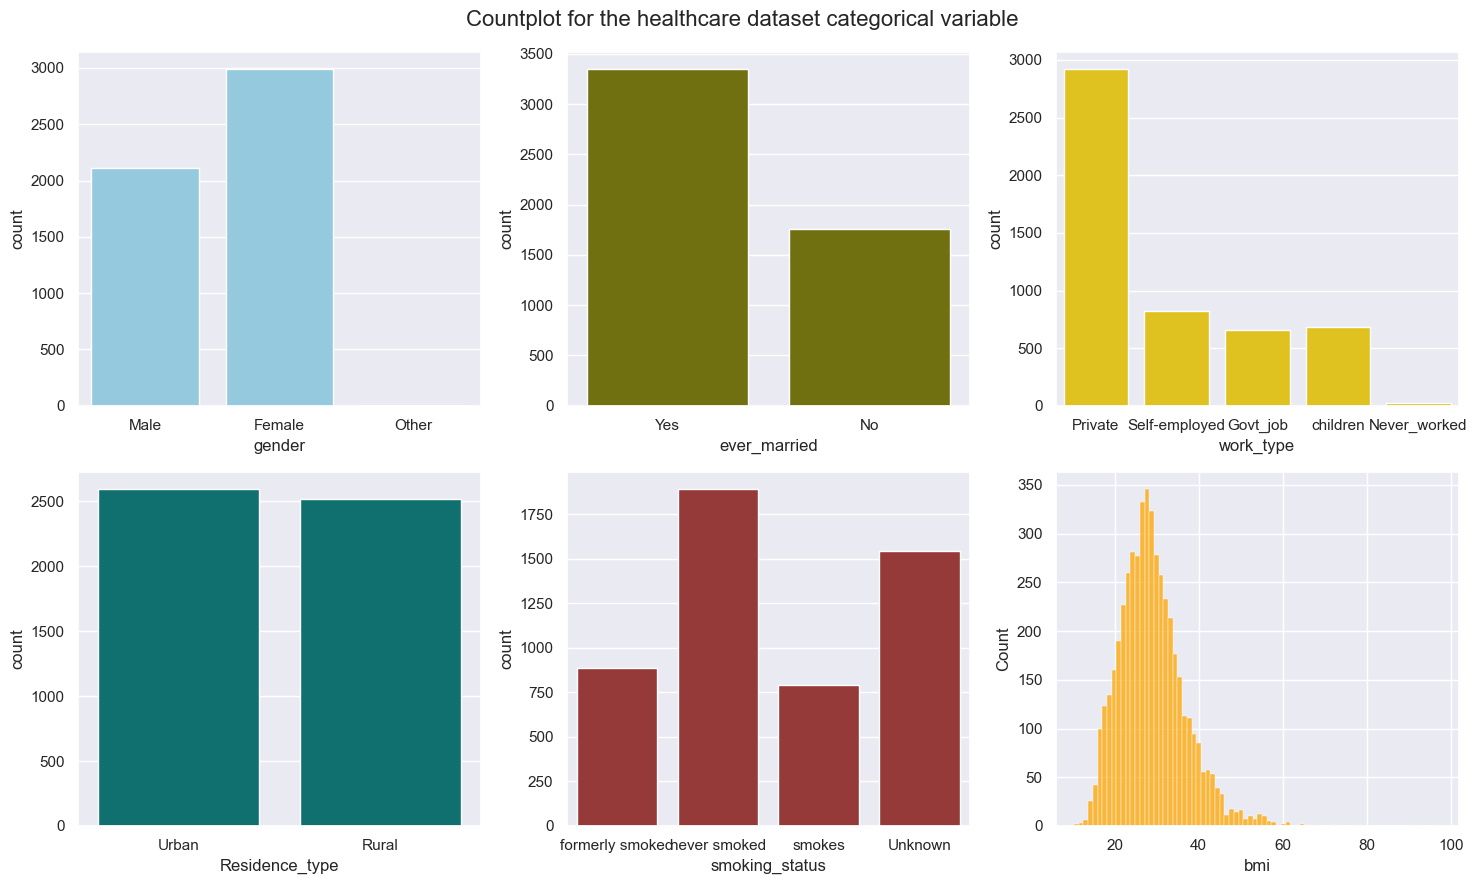

In [79]:
# Create a histogram for the categorical variable
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Countplot for the healthcare dataset categorical variable', fontsize=16)

# Plot the histogram
sns.countplot(data=df, x="gender", color="skyblue", ax=axs[0, 0])
sns.countplot(data=df, x="ever_married", color="olive", ax=axs[0, 1])
sns.countplot(data=df, x="work_type", color="gold", ax=axs[0, 2])
sns.countplot(data=df, x="Residence_type", color="teal", ax=axs[1, 0])
sns.countplot(data=df, x="smoking_status", color="brown", ax=axs[1, 1])
sns.histplot(data=df, x="bmi", color="orange", ax=axs[1, 2])
#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

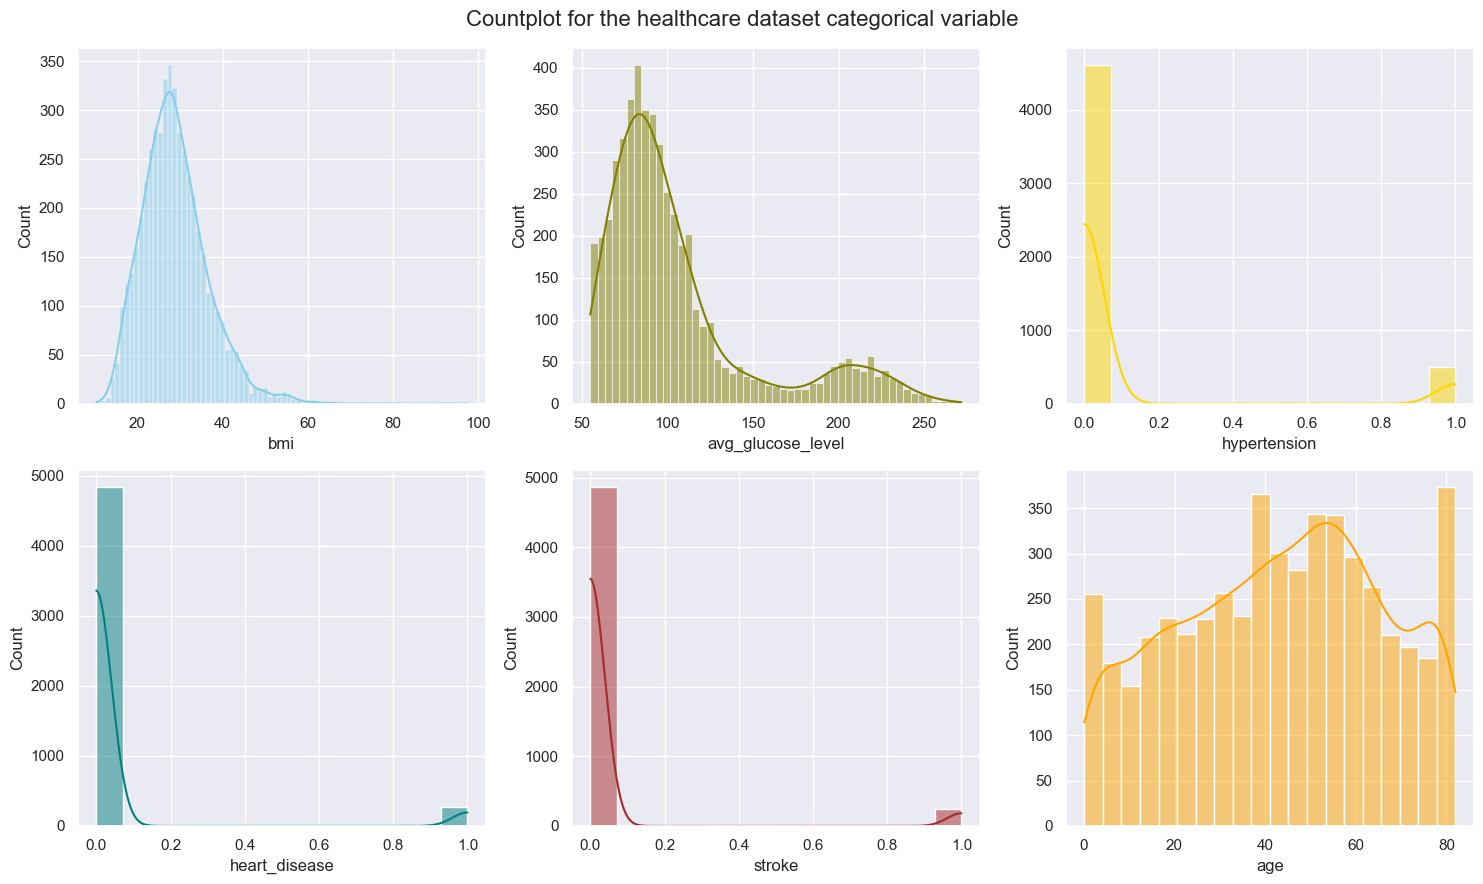

In [80]:
# Create a histogram for the columns with BMI NAN
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Countplot for the healthcare dataset categorical variable', fontsize=16)

# Plot the histogram
sns.histplot(data=df,kde=True, x="bmi", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df,kde=True, x="avg_glucose_level", color="olive", ax=axs[0, 1])
sns.histplot(data=df,kde=True, x="hypertension", color="gold", ax=axs[0, 2])
sns.histplot(data=df,kde=True, x="heart_disease", color="teal", ax=axs[1, 0])
sns.histplot(data=df,kde=True, x="stroke", color="brown", ax=axs[1, 1])
sns.histplot(data=df,kde=True, x="age", color="orange", ax=axs[1, 2])
#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [82]:
# summarize the dataset

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [83]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Missing values

- The BMI  column has 201 missing values


In [84]:
# Using age specific mean to fill out the BMI by inputtation

<Axes: xlabel='bmi', ylabel='Count'>

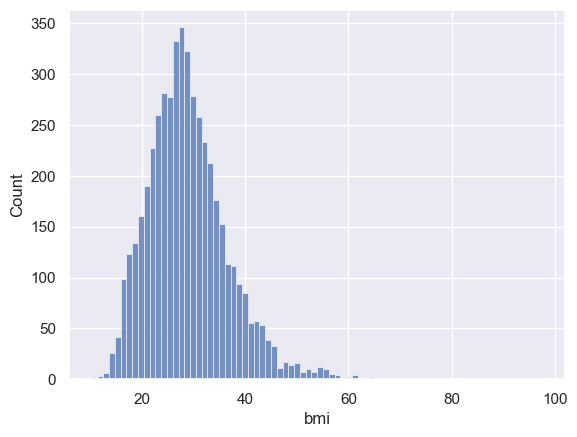

In [85]:
sns.histplot(df['bmi'])

<Axes: xlabel='age', ylabel='bmi'>

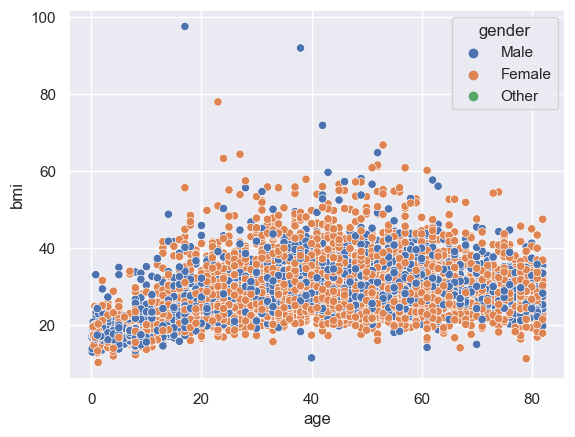

In [86]:
sns.scatterplot(data=df, x='age', y='bmi', hue='gender')

In [87]:
# Create a new dataframe with only the missing values
null_data = df[df.isnull().any(axis=1)]
null_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.0,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.0,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


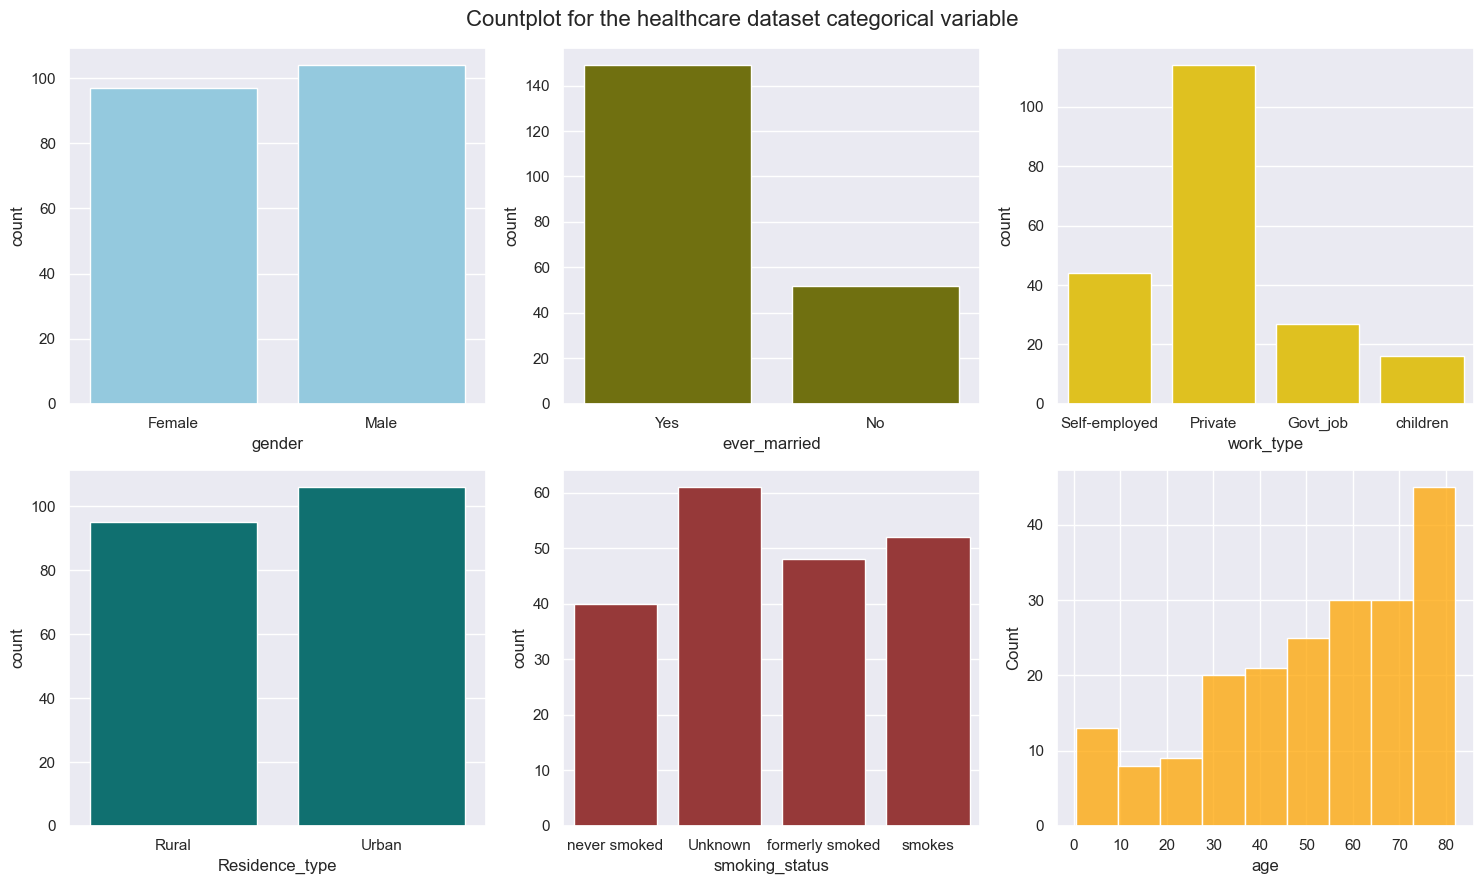

In [88]:
# Create a histogram for the columns with BMI NAN
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Countplot for the healthcare dataset categorical variable', fontsize=16)

# Plot the histogram
sns.countplot(data=null_data, x="gender", color="skyblue", ax=axs[0, 0])
sns.countplot(data=null_data, x="ever_married", color="olive", ax=axs[0, 1])
sns.countplot(data=null_data, x="work_type", color="gold", ax=axs[0, 2])
sns.countplot(data=null_data, x="Residence_type", color="teal", ax=axs[1, 0])
sns.countplot(data=null_data, x="smoking_status", color="brown", ax=axs[1, 1])
sns.histplot(data=null_data, x="age", color="orange", ax=axs[1, 2])
#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

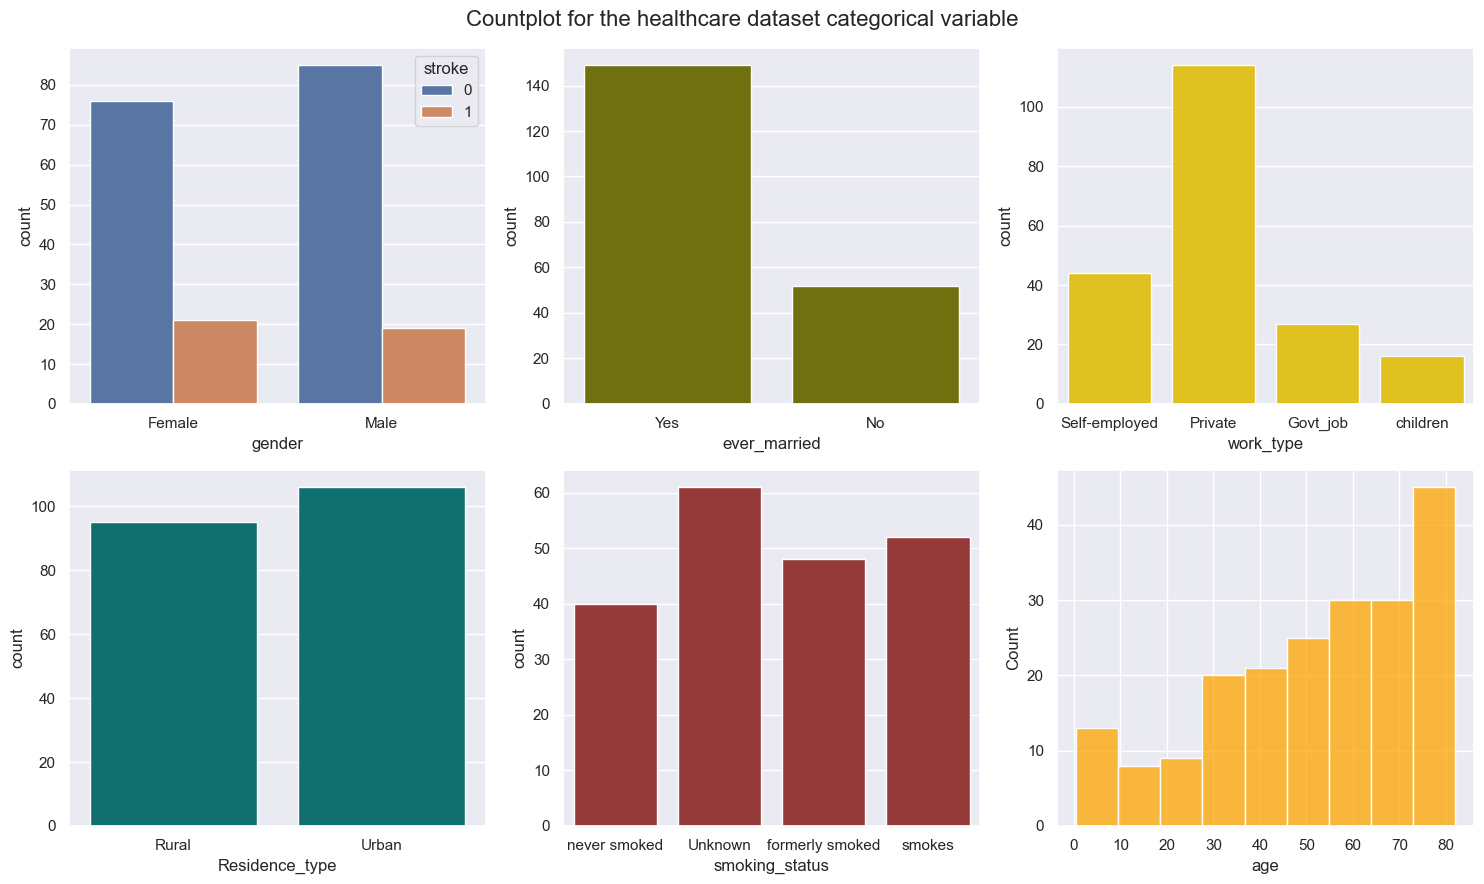

In [89]:
# Create a histogram for the columns with BMI NAN
# Create Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9))

# Add a title for the histogram
fig.suptitle('Countplot for the healthcare dataset categorical variable', fontsize=16)

# Plot the histogram
sns.countplot(data=null_data, x="gender", hue="stroke", ax=axs[0, 0])
sns.countplot(data=null_data, x="ever_married", color="olive", ax=axs[0, 1])
sns.countplot(data=null_data, x="work_type", color="gold", ax=axs[0, 2])
sns.countplot(data=null_data, x="Residence_type", color="teal", ax=axs[1, 0])
sns.countplot(data=null_data, x="smoking_status", color="brown", ax=axs[1, 1])
sns.histplot(data=null_data, x="age", color="orange", ax=axs[1, 2])
#plt.xticks(rotation=45)
# Adjust Layout
plt.tight_layout()
plt.show()

### Dealing with outliers
- Boxplot

<Axes: xlabel='stroke', ylabel='age'>

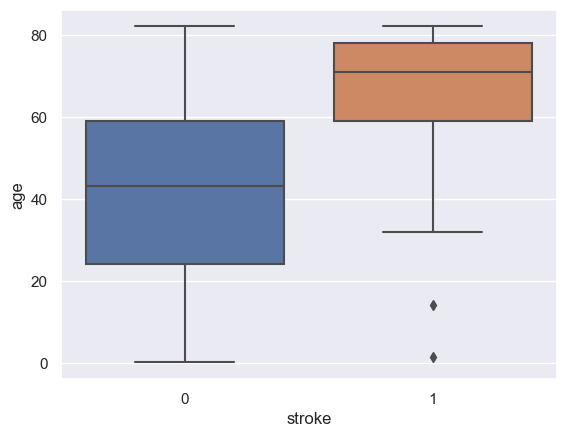

In [90]:
sns.boxplot(data=df,x='stroke',y='age')

### Relationship between age and stroke

In [91]:
# Check for the frequency of each distinct age in the dataset
df['age'].value_counts()


age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

In [92]:
# Replace missing BMIs with age specific mean BMI to 1 decimal place
# Calculate the mean BMI for each age
age_mean_bmi = df.groupby('age')['bmi'].mean().round(1)
print (age_mean_bmi)

age
0.08     15.5
0.16     14.8
0.24     17.4
0.32     18.1
0.40     15.8
         ... 
78.00    27.9
79.00    27.9
80.00    28.8
81.00    28.0
82.00    28.0
Name: bmi, Length: 104, dtype: float64


In [93]:
# Fill out the NAN missing values with age specific mean BMI
df['bmi'] = df['bmi'].fillna(df['age'].map(age_mean_bmi))


In [94]:
# Recheck for missing BMI values
df['bmi'].isnull().sum()

0

In [95]:
df.loc[19] 

id                      25226
gender                   Male
age                      57.0
hypertension                0
heart_disease               1
ever_married               No
work_type            Govt_job
Residence_type          Urban
avg_glucose_level      217.08
bmi                      32.2
smoking_status        Unknown
stroke                      1
Name: 19, dtype: object

## Generating synthetic wearable device data to enhance the traditional healthdataset from kaggle.
Three commonly measured health metrics by smart watches in the nmarket; resting heart rate, sleep duration and step counts are the variables for the synthetic data. The data synthesis process involved researching medical publications to get population reference ranges for these variables. These reference ranges were used to calculate the mean and standard deviations all of which were utilized in defining the functions as to simulate data as close as possible to real health data. The numpy random module generation was used for this.


#### Disclaimer

Please note that the values from the synthesized wearable device data though factoring in medical research and publications does not make the data suitable for clinical and research purposes due to potential pitfalls in the data generation process.

In [96]:
# Define function for calculating the mean and SD from a reference range

def calculate_mean_std(low_limit, high_limit):
    mean = (low_limit + high_limit) / 2
    std_dev = (mean - low_limit) / 2
    return mean, std_dev

In [97]:
# Call the funtion for a reference range  60 - 100 beats per minute for resting heart rate
low_limit = 60
high_limit =100

mean, std_dev = calculate_mean_std(low_limit, high_limit)

print(f"Mean: {mean}, Standard Deviation: {std_dev}")

Mean: 80.0, Standard Deviation: 10.0


In [98]:
# Set the random seed for reproducibility
np.random.seed(150)

### Reference range utilized for resting heart rate (RHR)

The mean and SDs were calculated with slight modifications and were used as conditions in the functions for random data synthesis in beats per minute.

1. Infants (1 month-1 year): 80-160 bpm

2. Childhood (1-12 years): 75 - 130 bpm

3. Others ≥ 13 years): 60-100 bpm

4. Where hypertension == 1: > 80 bpm

These were modified from the Omron data available [here](https://www.omron-healthcare.co.uk/health-and-lifestyle/normal-resting-heart-rate-by-age)

In [99]:
# Simulating Resting Heart Rate (RHR) 

def simulate_RHR(df):
    if df['age'] <= 1:
        RHR = np.random.normal(120, 20)  # mean and SD for 1 year and below
    elif df['age'] > 1 and df['age'] <= 12:
      RHR = np.random.normal(90, 20)  # mean and SD for > 1 to 12 years
    else:
       RHR = np.random.normal(80, 10)   # > 12 years and above
    
    # Adjust for hypertension
    if df['hypertension'] == 1:
       RHR += np.random.uniform(5, 15) # higher RHR for patients with hypertension

   # Set realistic limits for RHR
       RHR = max(60, min(RHR, 200))
    
    return round(RHR, 1) # Rounds to 1 decimal place


### Pair Plot for Exploring Relationships
Use a pair plot to visualize relationships between all continuous variables in the dataset.

### Correlation Analysis
### Create a heatmap with the correlation matrix

In [100]:
# Correlation Analysis
# Create a heatmap with the correlation matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap for healthcare dataset', fontsize=16)

# Show the plot
plt.show()

ValueError: could not convert string to float: 'Male'

<Figure size 1000x800 with 0 Axes>

## References
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download
- https://www.analyticsvidhya.com/blog/2021/05/how-to-create-a-stroke-prediction-model/
- https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://medium.com/@jeffdm88/machine-learning-for-stroke-prediction-ab886a1f7828
- https://www.omron-healthcare.co.uk/health-and-lifestyle/normal-resting-heart-rate-by-age